# Stitch individual tif files into whole-slide images

Stitcing in scPortrait is built on top of the [Ashlar](https://labsyspharm.github.io/ashlar/) package.

When stitching from `.tif` files, Ashlar reads channel and tile position information from filenames according to a predefined `pattern`. Hence, filenames matter when stitching from `.tif` files.

In [5]:
import os
import numpy as np

import matplotlib.pyplot as plt

from scportrait.data._datasets import dataset_stitching_example
from scportrait.tools.stitch import ParallelStitcher, Stitcher

## Single-threaded Stitching

### Initializing the `Stitcher` object

In [ ]:
input_dir = dataset_stitching_example()
slidename = "stitching_test"
outdir = os.path.join(str(input_dir).replace("stitching_example", "example_projects/stitching"), slidename)

row = str(2).zfill(2)  # specify the row of the well you want to stitch, here = 2
well = str(4).zfill(2)  # specifc the well number you wish to stitch, here = 4
zstack_value = str(1).zfill(
    3
)  # specify the zstack you want to stitch. for multiple zstacks please make a loop and iterate through each of them.
timepoint = str(1).zfill(3)  # specify the timepoint you wish to stitch

pattern = f"Timepoint{timepoint}_Row{row}_Well{well}_{{channel}}_zstack{zstack_value}_r{{row:03}}_c{{col:03}}.tif"

# initialize stitcher
stitcher = Stitcher(
    os.path.abspath(input_dir),
    slidename,
    outdir,
    pattern=pattern,
    stitching_channel="Alexa488",
    channel_order=[
        "DAPI",
        "Alexa488",
        "mCherry",
    ],  # this can be used to override the order of channels in the final stitched image for image types like ome.zarr, if not specified alphabetical order is used
    overlap=0.1,
    max_shift=30,
    filter_sigma=0,
    rescale_range={"Alexa488": (1, 99), "DAPI": (1, 99), "mCherry": (1, 99)},
    overwrite=True,
    image_dtype=np.uint16,
)

Output directory at /Users/sophia/Documents/GitHub/scPortrait/src/scportrait/scportrait_data/example_projects/stitching/stitching_test already exists, overwriting.


You can access information on which channels are present in your dataset and the specific values of the parameters relevant to stitching by executing:

In [3]:
stitcher.get_stitching_information()

Tile positions will be calculated based on channel: Alexa488
Channel Names: ['Alexa488', 'DAPI', 'mCherry']
Overlap of image tiles: 0.1
Max Shift value: 30
Filter Sigma value: 0
Output will be written to: /Users/sophia/Documents/GitHub/scPortrait/src/scportrait/scportrait_data/example_projects/stitching/stitching_test


### Generating thumbnails

In [4]:
stitcher.generate_thumbnail()

    assembling thumbnail 1/9Setting dtype to uint16
    assembling thumbnail 2/9uint16


AttributeError: 'FilePatternReaderRescale' object has no attribute 'dtype'

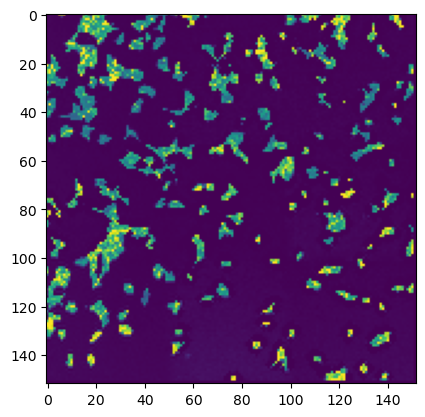

In [ ]:
# thumbnail is saved in the stitcher object and can be accessed via stitcher.thumbnail
plt.imshow(stitcher.thumbnail)

In [ ]:
# alterantively it can be saved to a tif file
stitcher.write_thumbnail()

### Generating full-scale stitched image

performing stitching on channel Alexa488 with id number 0
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
    quantifying alignment error 1000/1000
    aligning edge 12/12
Alignment complete.
current channel order:  [0, 1, 2]
new channel order [1, 0, 2]
assembling mosaic with shape (3, 3040, 3038)
created tempmmap array for assembled mosaic at /Users/sophia/Documents/GitHub/scPortrait/src/scportrait/scportrait_data/example_projects/stitching/stitching_test/temp_mmap_l7emive9/temp_mmap_437205595765982276.hdf


  0%|          | 0/3 [00:00<?, ?it/s]

        merging tile 1/9Setting dtype to uint16
        merging tile 2/9Setting dtype to uint16
        merging tile 3/9Setting dtype to uint16
        merging tile 4/9Setting dtype to uint16
        merging tile 5/9Setting dtype to uint16
        merging tile 6/9Setting dtype to uint16
        merging tile 7/9Setting dtype to uint16
        merging tile 8/9Setting dtype to uint16
        merging tile 9/9Setting dtype to uint16


 33%|███▎      | 1/3 [00:00<00:01,  1.06it/s]


        merging tile 1/9Setting dtype to uint16
        merging tile 2/9Setting dtype to uint16
        merging tile 3/9Setting dtype to uint16
        merging tile 4/9Setting dtype to uint16
        merging tile 5/9Setting dtype to uint16
        merging tile 6/9Setting dtype to uint16
        merging tile 7/9Setting dtype to uint16
        merging tile 8/9Setting dtype to uint16
        merging tile 9/9Setting dtype to uint16


 67%|██████▋   | 2/3 [00:01<00:00,  1.08it/s]


        merging tile 1/9Setting dtype to uint16
        merging tile 2/9Setting dtype to uint16
        merging tile 3/9Setting dtype to uint16
        merging tile 4/9Setting dtype to uint16
        merging tile 5/9Setting dtype to uint16
        merging tile 6/9Setting dtype to uint16
        merging tile 7/9Setting dtype to uint16
        merging tile 8/9Setting dtype to uint16
        merging tile 9/9Setting dtype to uint16


100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

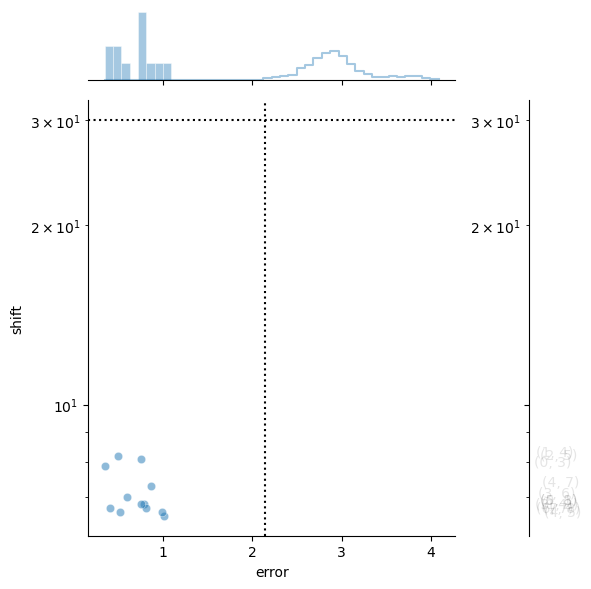

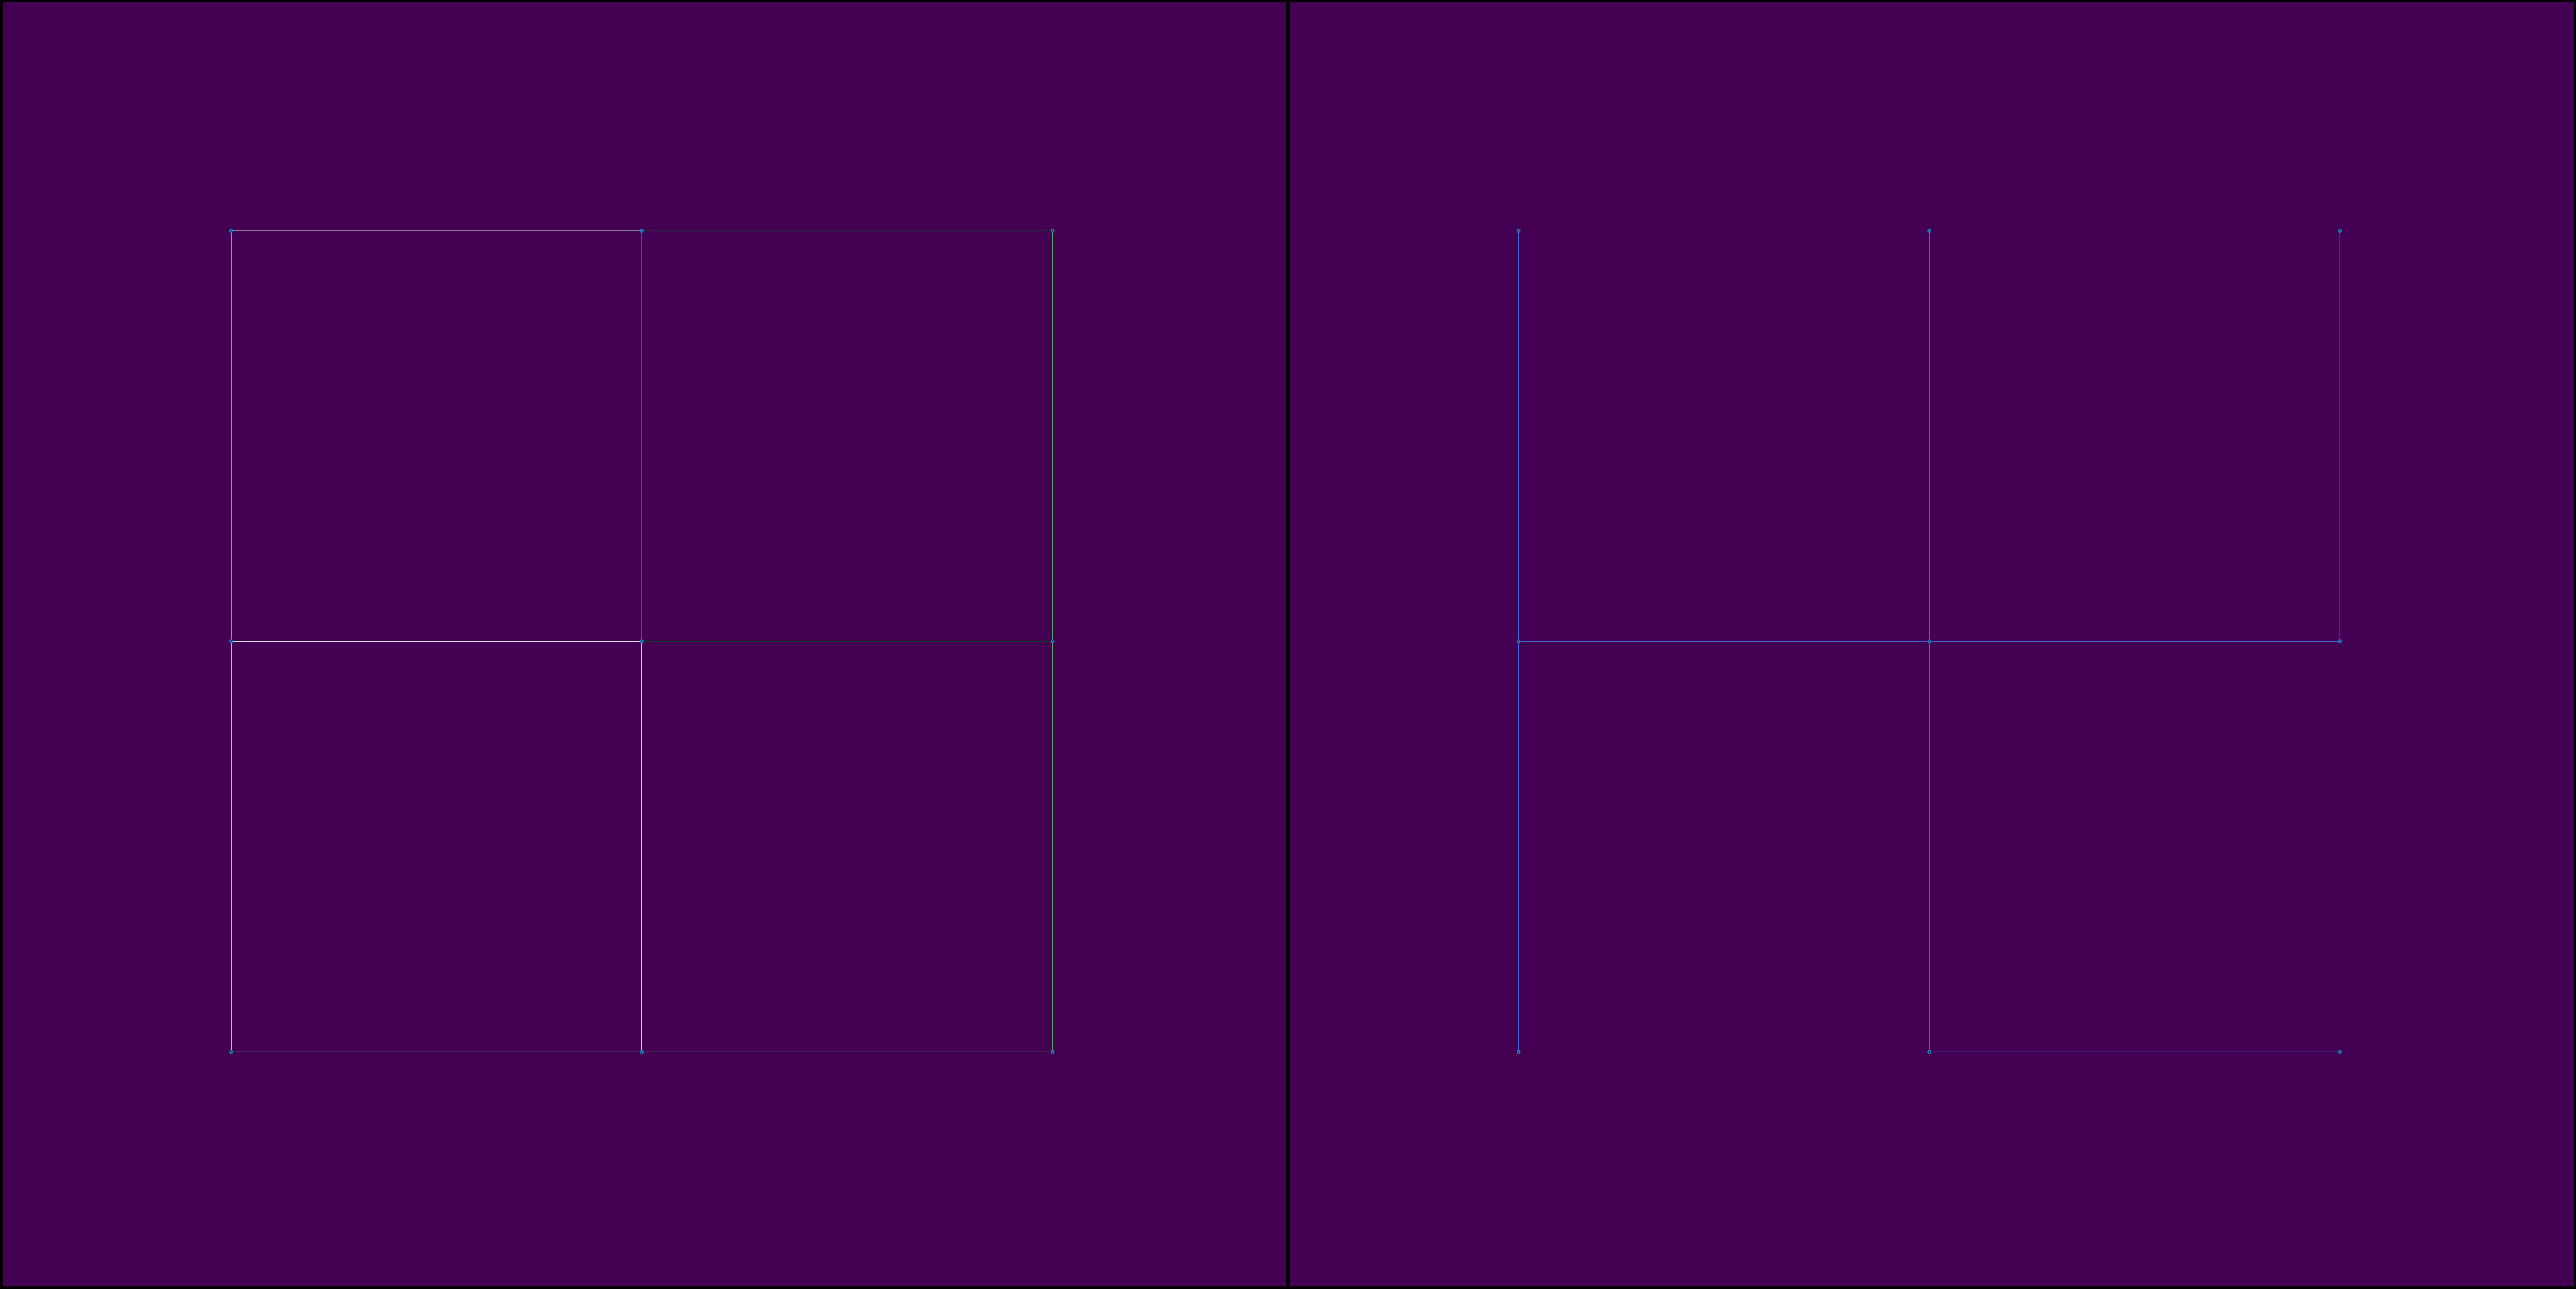

In [ ]:
stitcher.stitch()

In [ ]:
# the stitched image is saved in the stitcher object and can be accessed via stitcher.assembled_mosaic
stitcher.assembled_mosaic

dask.array<from-value, shape=(3, 3040, 3038), dtype=uint16, chunksize=(3, 3040, 3038), chunktype=numpy.ndarray>

In [ ]:
# the stitched image can then be written to a variety of output formats

stitcher.write_tif(export_xml=True)
stitcher.write_ome_zarr()

(-0.5, 3037.5, 3039.5, -0.5)

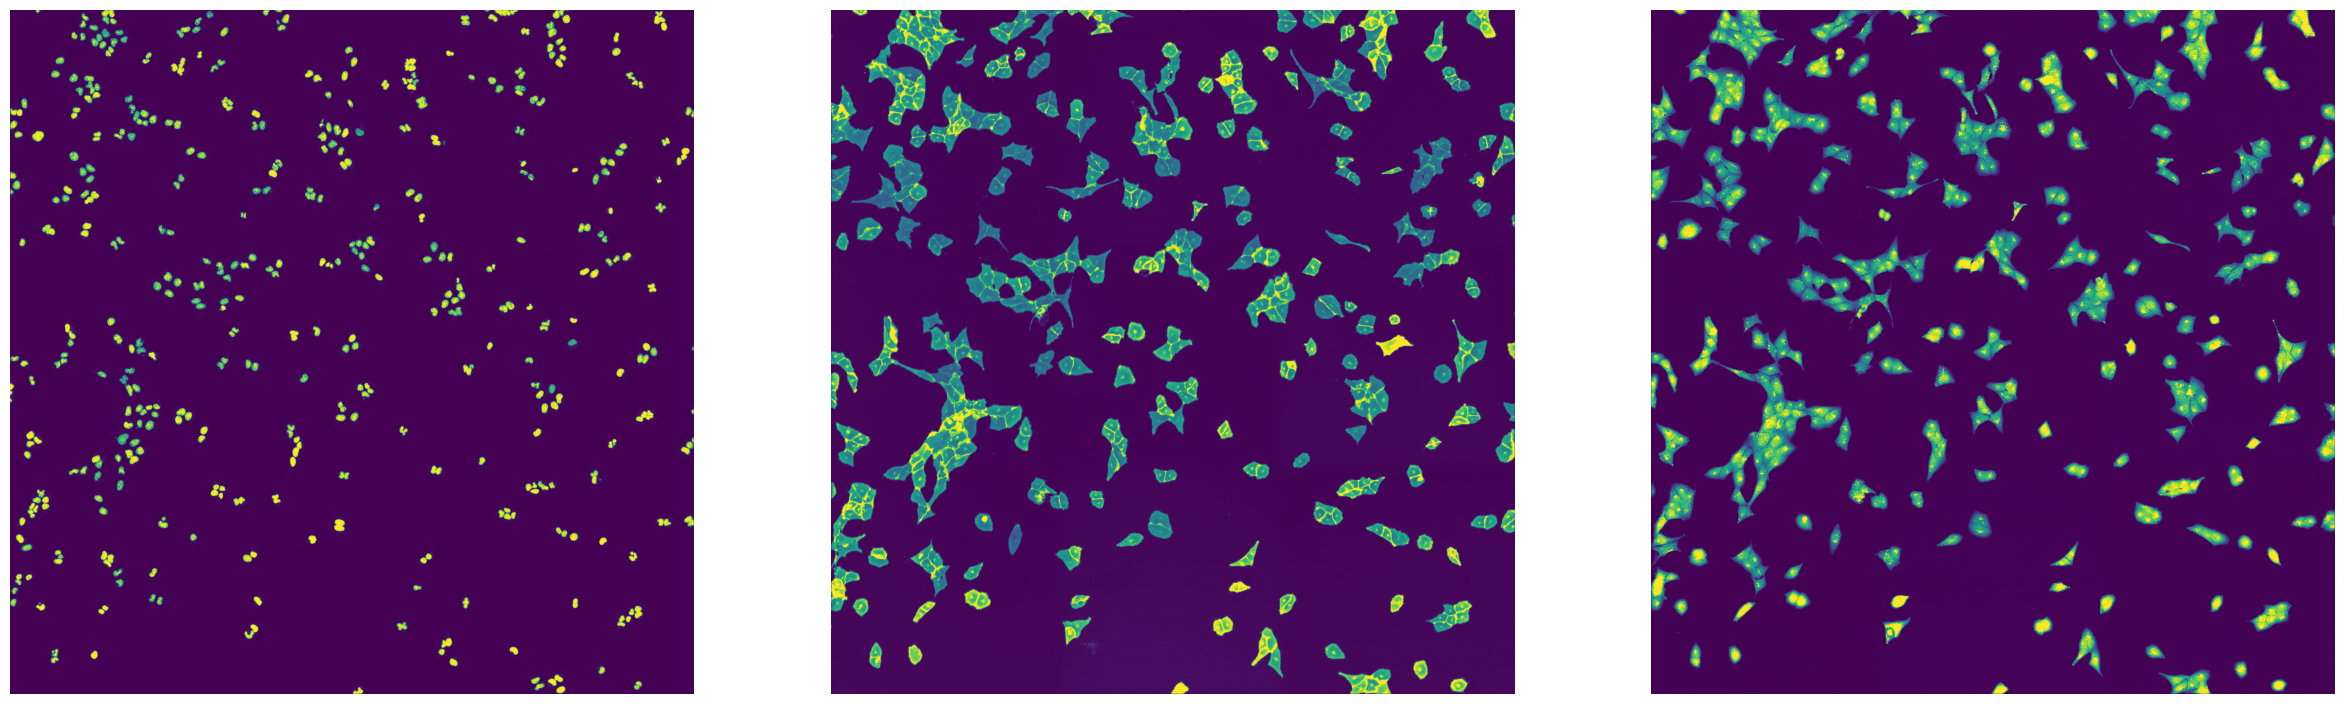

In [ ]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(imread(f"{outdir}/stitching_test_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir}/stitching_test_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir}/stitching_test_mCherry.tif"))
axs[2].axis("off")

In [ ]:
del stitcher

## Multi-threaded Stitching

The `ParallelStitcher` class can speed up stitching by using multiple threads. The code to start stitching remains the same, but `ParallelStitcher` takes an additional argument `threads`, specifying the number of parallel threads to use. This multi-threaded implementation uses some of ashlars base functionality but implements custom functions for several processing steps.

### Initializing the `ParallelStitcher` object

In [ ]:
input_dir = dataset_stitching_example()
slidename = "stitching_test_parallel"
outdir_parallel = os.path.join(str(input_dir).replace("stitching_example", "example_projects/stitching"), slidename)


row = str(2).zfill(2)  # specify the row of the well you want to stitch, here = 2
well = str(4).zfill(2)  # specifc the well number you wish to stitch, here = 4
zstack_value = str(1).zfill(
    3
)  # specify the zstack you want to stitch. for multiple zstacks please make a loop and iterate through each of them.
timepoint = str(1).zfill(3)  # specify the timepoint you wish to stitch

pattern = f"Timepoint{timepoint}_Row{row}_Well{well}_{{channel}}_zstack{zstack_value}_r{{row:03}}_c{{col:03}}.tif"

# initialize stitcher
stitcher = ParallelStitcher(
    input_dir,
    slidename,
    outdir_parallel,
    pattern=pattern,
    stitching_channel="Alexa488",
    channel_order=["DAPI", "Alexa488", "mCherry"],
    overlap=0.1,
    max_shift=30,
    filter_sigma=0,
    rescale_range={"Alexa488": (1, 99), "DAPI": (1, 99), "mCherry": (1, 99)},
    overwrite=True,
    threads=12,
)

Output directory at /Users/sophia/Documents/GitHub/scPortrait/src/scportrait/scportrait_data/example_projects/stitching/stitching_test_parallel already exists, overwriting.


### Generating thumbnails

In [ ]:
stitcher.generate_thumbnail()

    assembling thumbnail 1/9Setting dtype to uint16
    assembling thumbnail 2/9Setting dtype to uint16
    assembling thumbnail 3/9Setting dtype to uint16
    assembling thumbnail 4/9Setting dtype to uint16
    assembling thumbnail 5/9Setting dtype to uint16
    assembling thumbnail 6/9Setting dtype to uint16
    assembling thumbnail 7/9Setting dtype to uint16
    assembling thumbnail 8/9Setting dtype to uint16
    assembling thumbnail 9/9Setting dtype to uint16



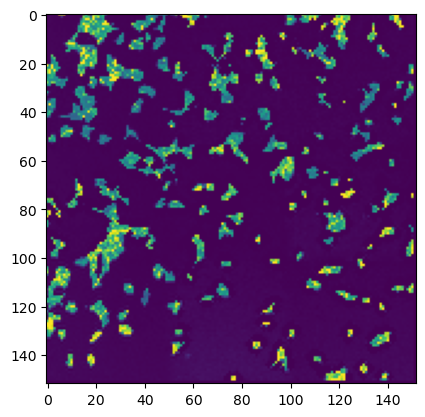

In [ ]:
# thumbnail is saved in the stitcher object and can be accessed via stitcher.thumbnail
plt.imshow(stitcher.thumbnail)

In [ ]:
# alterantively it can be saved to a tif file
stitcher.write_thumbnail()

### Generating full-scale stitched image

performing stitching on channel Alexa488 with id number 0
    quantifying alignment error:   0%|          | 0/1000 [00:00<?, ?it/s]Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype toSetting dtype to uint16
 uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
Setting dtype to uint16
                  aligning edge: 100%|██████████| 12/12 [00:00<00:00, 16.49it/s]
using graph-tool to build spanning tree
Alignment complete.
current channel order:  [0, 1, 2]
new channel order [1, 0, 2]
assembling mosaic with shape (3, 3040, 3038)
created tempmmap arra

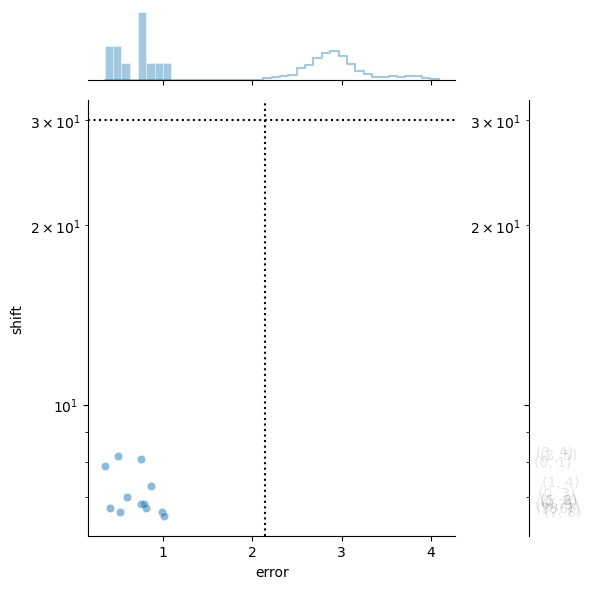

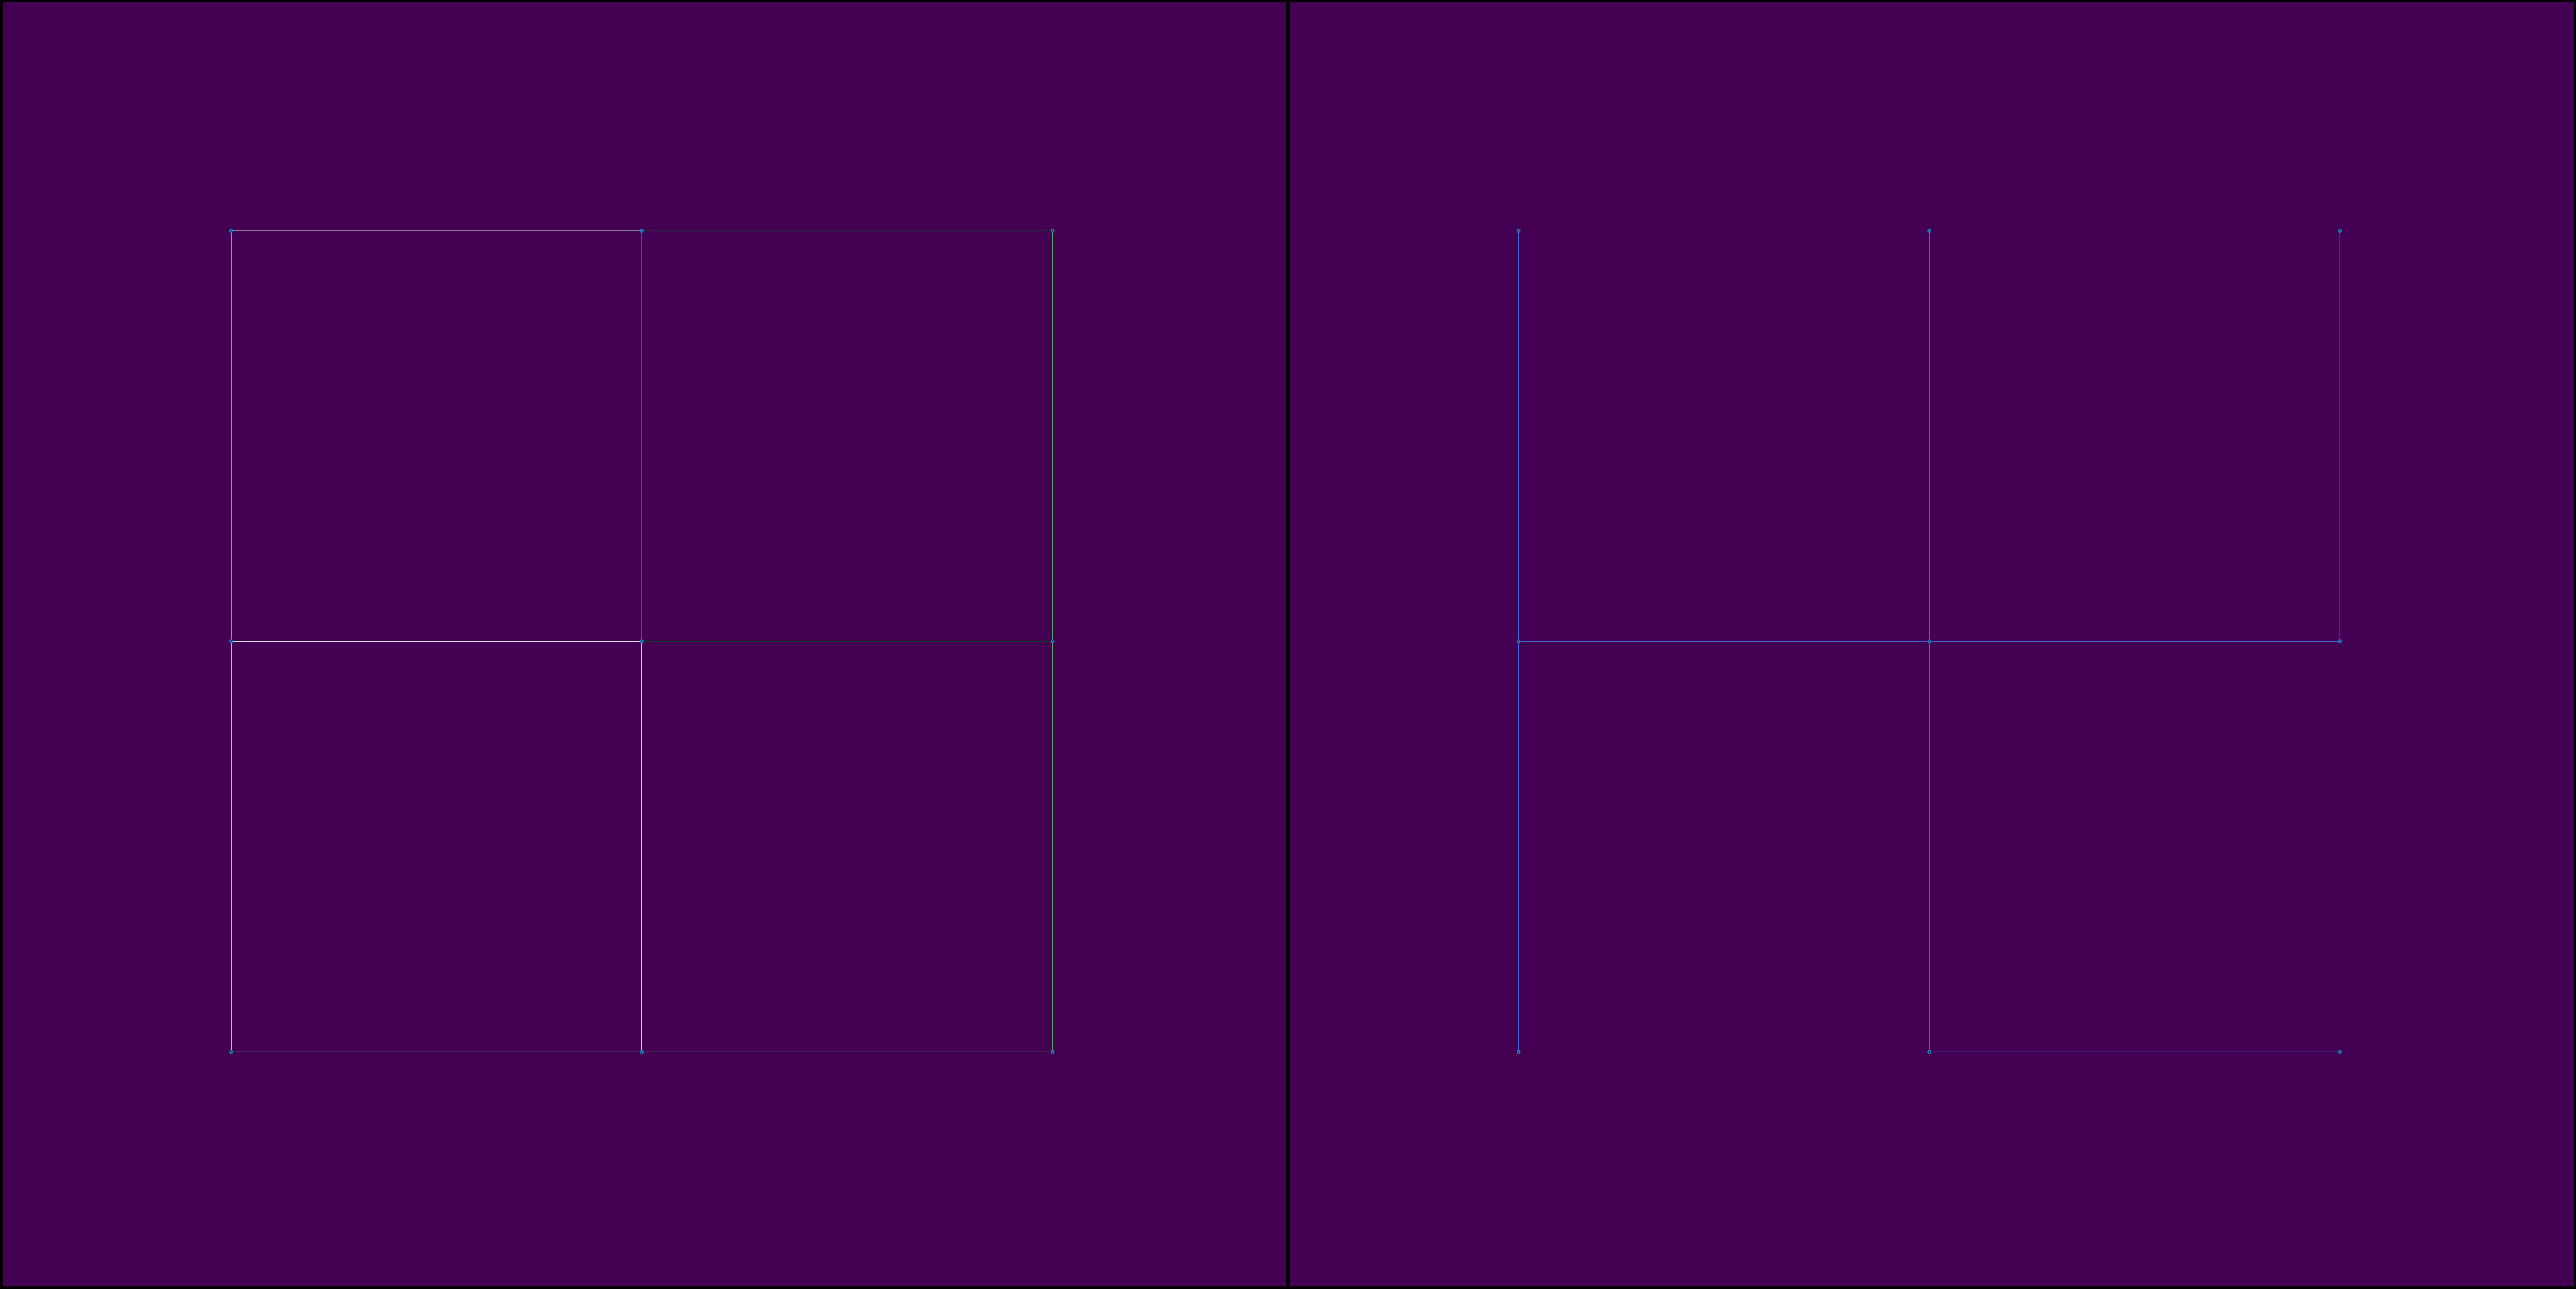

In [ ]:
stitcher.stitch()

In [ ]:
# the stitched image is saved in the stitcher object and can be accessed via stitcher.assembled_mosaic
stitcher.assembled_mosaic

dask.array<from-value, shape=(3, 3040, 3038), dtype=uint16, chunksize=(3, 3040, 3038), chunktype=numpy.ndarray>

In [ ]:
# the stitched image can then be written to a variety of output formats

stitcher.write_tif(export_xml=True)

# alternatively the stitched images can also be written out to tifs in a multi-threaded format
# speedups here are limited by write speed to disk, the number of threads is limited by the number of channels available
stitcher.write_tif_parallel(export_xml=True)

stitcher.write_ome_zarr()

writing tif files: 100%|██████████| 3/3 [00:00<00:00, 190.59it/s]


## Visualize Stitching Output

(-0.5, 3037.5, 3039.5, -0.5)

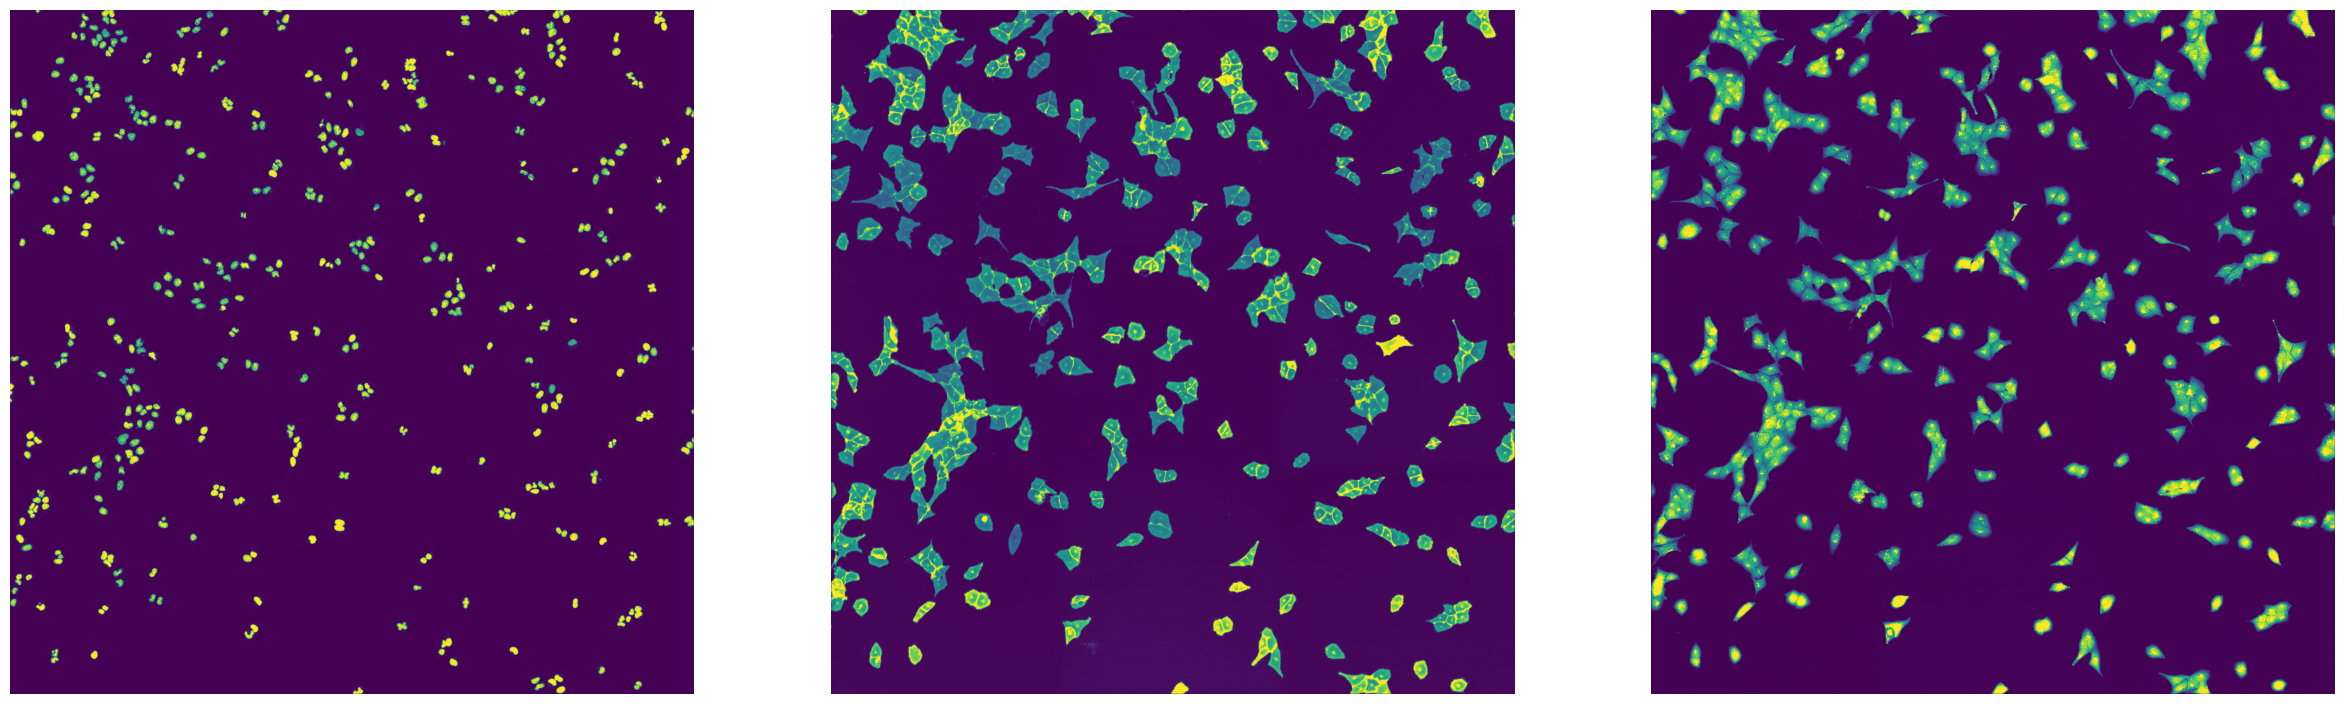

In [ ]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(imread(f"{outdir_parallel}/stitching_test_parallel_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir_parallel}/stitching_test_parallel_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir_parallel}/stitching_test_parallel_mCherry.tif"))
axs[2].axis("off")

The results generated from a parallelized vs a single-threaded run are identical. 

In [ ]:
# compare parallel and non-parallel stitching

imread(f"{outdir_parallel}/stitching_test_parallel_Alexa488.tif") == imread(f"{outdir}/stitching_test_Alexa488.tif")

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
del stitcher